# Producing a model to predict House Prices


## Importing data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

house_prices_data = pd.read_csv('house_prices.csv')
features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
X = house_prices_data[features]
y = house_prices_data.SalePrice

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, train_size=0.3)

## Decision Tree Regression

32 nodes returns MAE of 32157.998435896006


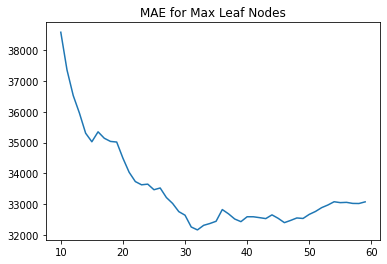

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    dtr_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    dtr_model.fit(train_X, train_y)
    predicted_val_y = dtr_model.predict(val_X)
    return mean_absolute_error(val_y, predicted_val_y)

scores = {nodes: get_mae(nodes, train_X, val_X, train_y, val_y) for nodes in range(10, 60)}
best_leaf_nodes = min(scores, key=scores.get)

scores_df = pd.Series(scores)
scores_df.plot.line(title="MAE for Max Leaf Nodes")
print(f'{best_leaf_nodes} nodes returns MAE of {scores[best_leaf_nodes]}')

In [3]:
dtr_mae = scores[best_leaf_nodes]
dtr_model = DecisionTreeRegressor(max_leaf_nodes=best_leaf_nodes, random_state=1)

## Random Forest Regression

In [4]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
predicted_val_y = rf_model.predict(val_X)
rfr_mae = mean_absolute_error(val_y, predicted_val_y)

print(f'Random Forest Regressor returns MAE of {rfr_mae}')

Random Forest Regressor returns MAE of 25424.857460861054


## K Neighbours Regression

3 neighbors returns MAE of 37876.35127201566


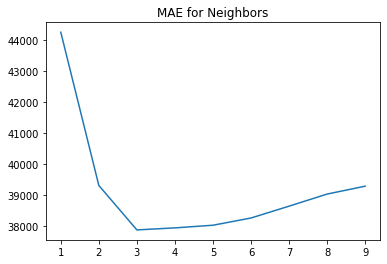

In [5]:
from sklearn.neighbors import KNeighborsRegressor

def get_mae(n_neighbors, train_X, val_X, train_y, val_y):
    knr_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knr_model.fit(train_X, train_y)
    predicted_val_y = knr_model.predict(val_X)
    return mean_absolute_error(val_y, predicted_val_y)

scores = {neighbors: get_mae(neighbors, train_X, val_X, train_y, val_y) for neighbors in range(1, 10)}
best_neighbors = min(scores, key=scores.get)

scores_df = pd.Series(scores)
scores_df.plot.line(title="MAE for Neighbors")
print(f'{best_neighbors} neighbors returns MAE of {scores[best_neighbors]}')

In [6]:
knr_mae = scores[best_neighbors]
knr_model = KNeighborsRegressor(n_neighbors=best_neighbors)

## Comparison

<AxesSubplot:title={'center':'Model Comparison'}>

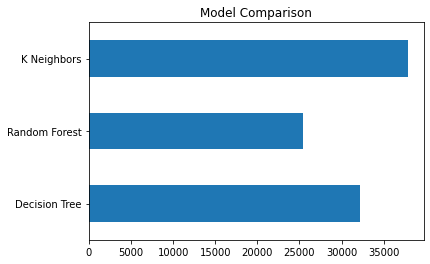

In [7]:
models = pd.Series({'Decision Tree': dtr_mae,
                    'Random Forest': rfr_mae,
                    'K Neighbors': knr_mae})
models.plot.barh(title='Model Comparison')